In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

### load data ###

In [2]:
df = pd.read_csv('flights_clean.csv')
df.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime'],axis=1,inplace=True)
df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,WN,335,N712SW,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,WN,3231,N772SW,128.0,145.0,2.0,19.0,IAD,TPA,810
2,1,3,4,WN,448,N428WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,1,3,4,WN,3920,N464WN,90.0,90.0,34.0,34.0,IND,BWI,515
4,1,3,4,WN,378,N726SW,101.0,115.0,11.0,25.0,IND,JAX,688


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928366 entries, 0 to 1928365
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   UniqueCarrier      object 
 4   FlightNum          int64  
 5   TailNum            object 
 6   ActualElapsedTime  float64
 7   CRSElapsedTime     float64
 8   ArrDelay           float64
 9   DepDelay           float64
 10  Origin             object 
 11  Dest               object 
 12  Distance           int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 191.3+ MB


### Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

**quines variables agafem para classificar els diferents vols?**
+ agafem variables numeriques i variables categoricas
+ variables numeriques, totes aquelles que potencialment podem tenir sentit

    + Month, DayofMonth, dayOfWeek,ArrDelay,DepDelay
    
+ variables categoriques:

    + UniqueCarrier code
    + TailNum

In [4]:
numeric_cols = df[['Month','DayofMonth','DayOfWeek','FlightNum','ActualElapsedTime','ArrDelay','DepDelay','Distance']]
categorical_cols = df[['UniqueCarrier','TailNum','Origin','Dest']]

In [5]:
numeric_cols.head()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Distance
0,1,3,4,335,128.0,-14.0,8.0,810
1,1,3,4,3231,128.0,2.0,19.0,810
2,1,3,4,448,96.0,14.0,8.0,515
3,1,3,4,3920,90.0,34.0,34.0,515
4,1,3,4,378,101.0,11.0,25.0,688


In [6]:
categorical_cols.head()

,UniqueCarrier,TailNum,Origin,Dest
0,WN,N712SW,IAD,TPA
1,WN,N772SW,IAD,TPA
2,WN,N428WN,IND,BWI
3,WN,N464WN,IND,BWI
4,WN,N726SW,IND,JAX


In [7]:
categorical_cols.nunique()
# Hay 20 UniqueCarrrier pero 303 diferentes aeropuertos de Origen o de Destino y 5360 TailNum diferentes


UniqueCarrier      20
TailNum          5360
Origin            303
Dest              302
dtype: int64

In [8]:
# creamos un LabelEncoder para las variables categoricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
categoricals_transform = categorical_cols.apply(le.fit_transform)

In [10]:
numeric_cols.shape,categoricals_transform.shape

((1928366, 8), (1928366, 4))

In [11]:
df1 = pd.concat([categoricals_transform,numeric_cols],axis=1)

In [12]:
df1.head()

,UniqueCarrier,TailNum,Origin,Dest,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,ArrDelay,DepDelay,Distance
0,17,3756,135,284,1,3,4,335,128.0,-14.0,8.0,810
1,17,4116,135,284,1,3,4,3231,128.0,2.0,19.0,810
2,17,1948,140,48,1,3,4,448,96.0,14.0,8.0,515
3,17,2129,140,48,1,3,4,3920,90.0,34.0,34.0,515
4,17,3839,140,149,1,3,4,378,101.0,11.0,25.0,688


In [ ]:
# anem a aplicar un PCA per quedarnos amb 3 components principals per veure com queden agrupats

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3'])

principalDf.head()

,pc1,pc2,pc3
0,-1605.446253,-1384.085794,-147.047479
1,1286.468489,-1175.716340,184.658565
2,-1810.779080,412.739231,-459.338798
3,1607.961192,908.402514,-66.285598
4,-1533.080538,-1456.712060,-265.501977


Text(0.5, 0, 'pc3')

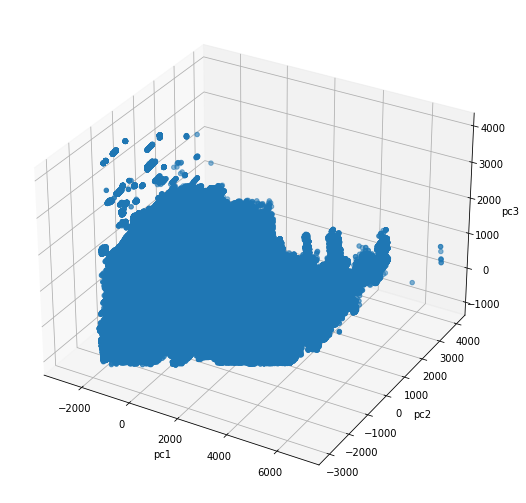

In [43]:
threedee = plt.figure(figsize=(15,9)).gca(projection='3d')
threedee.scatter(principalDf['pc1'],principalDf['pc2'], principalDf['pc3'],cmap=principalDf['pc3'])
threedee.set_xlabel('pc1')
threedee.set_ylabel('pc2')
threedee.set_zlabel('pc3')

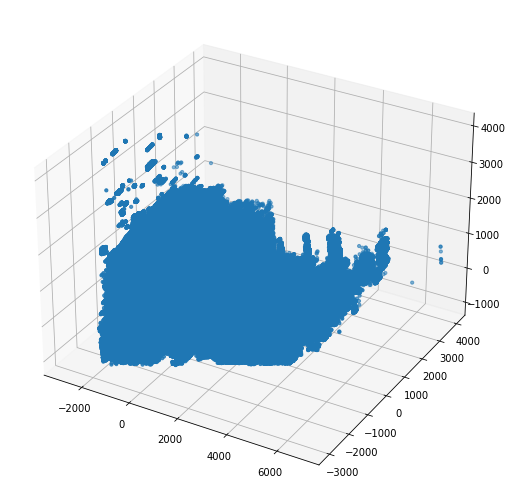

In [46]:
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(principalDf['pc1'],principalDf['pc2'],principalDf['pc3'],s=10) # plot the 3D figure
plt.show()


In [ ]:
principalDf.plot(x='pc1',y='pc2',kind='scatter')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(numerical_features),columns=numerical_features.columns)

In [ ]:
df_scaled.head()

In [ ]:
df_origin= pd.get_dummies(df['Origin'], prefix = None, drop_first=False)
df_origin.head()

In [ ]:
df_dest= pd.get_dummies(df['Dest'], prefix = None, drop_first=False)
df_dest.head()

In [ ]:
df_final = pd.concat([df_scaled,df[['DayofMonth','DayOfWeek']],df_carrier,df_origin,df_dest],axis=1)

In [ ]:
df_final.tail()

In [ ]:
df_final.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_final)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])

principalDf.head()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
n_clusters = np.arange(5,65,10)
inercias = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300}
for cluster in n_clusters:    
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs)
    knn.fit(df_scaled)
    err = knn.inertia_
    print(cluster,err)
    inercias.append(err)


In [ ]:
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

'The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 
'

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
